In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv('cleaned_data_final.csv')

Creating Features: Age, Opportunity_Duration, Engagement_Lag

In [2]:
df['Date of Birth'] = pd.to_datetime(df['Date of Birth'], errors='coerce')
df['Opportunity Start Date'] = pd.to_datetime(df['Opportunity Start Date'], errors='coerce')
df['Opportunity End Date'] = pd.to_datetime(df['Opportunity End Date'], errors='coerce')
df['Apply Date'] = pd.to_datetime(df['Apply Date'], errors='coerce')

# Feature engineering
print("\nCreating new features...")
df['Age'] = df['Date of Birth'].apply(lambda dob: pd.Timestamp.now().year - dob.year if pd.notnull(dob) else np.nan)
df['Opportunity_Duration'] = (df['Opportunity End Date'] - df['Opportunity Start Date']).dt.days
df['Engagement_Lag'] = (df['Opportunity Start Date'] - df['Apply Date']).dt.days.abs()


print(df[['Age', 'Opportunity_Duration', 'Engagement_Lag']].head())


Creating new features...
   Age  Opportunity_Duration  Engagement_Lag
0   24                   604             223
1   25                   604             179
2   26                   604             341
3   25                   604              64
4   29                   604             486


In [3]:
df['Engagement_Lag'] = (df['Opportunity Start Date'] - df['Apply Date']).dt.days.abs()

In [4]:
print("\nHandling missing values...")
print(f"Missing values before handling:\n{df[['Age', 'Opportunity_Duration', 'Engagement_Lag']].isna().sum()}")
df['Engagement_Lag'] = df['Engagement_Lag'].fillna(df['Engagement_Lag'].median())
df['Opportunity_Duration'] = df['Opportunity_Duration'].fillna(df['Opportunity_Duration'].median())
df['Age'] = df['Age'].fillna(df['Age'].median())
print(f"Missing values after handling:\n{df[['Age', 'Opportunity_Duration', 'Engagement_Lag']].isna().sum()}")


Handling missing values...
Missing values before handling:
Age                     0
Opportunity_Duration    0
Engagement_Lag          0
dtype: int64
Missing values after handling:
Age                     0
Opportunity_Duration    0
Engagement_Lag          0
dtype: int64


Normalization: used MinMaxScaler to scale features like Age, Duration, and Lag between 0 and 1

In [5]:
print("\nNormalizing numerical features...")
scaler = MinMaxScaler()
num_features = ['Age', 'Opportunity_Duration', 'Engagement_Lag']
df[num_features] = scaler.fit_transform(df[num_features])
print(df[['Age', 'Opportunity_Duration', 'Engagement_Lag']].head())


Normalizing numerical features...
        Age  Opportunity_Duration  Engagement_Lag
0  0.222222              0.723934        0.451417
1  0.244444              0.723934        0.362348
2  0.266667              0.723934        0.690283
3  0.244444              0.723934        0.129555
4  0.333333              0.723934        0.983806


Encoding categorical Data

In [6]:
print("\nEncoding categorical features...")
print("\nOriginal categorical values:")
print(df[['Gender', 'Country', 'Current/Intended Major', 'Status Description']].head())

# Label encoding for status
print("\nLabel encoding for Status Description:")
status_order = ['Waitlisted', 'Started', 'Team Allocated', 'Withdraw', 'Rewards Award']
print(f"Encoding order: {status_order}")

df['Status_Encoded'] = df['Status Description'].map(
    {status: i for i, status in enumerate(status_order)}
).fillna(-1)

print("\nStatus values after encoding (first 5 rows):")
print(df[['Status Description', 'Status_Encoded']].head(10))


Encoding categorical features...

Original categorical values:
   Gender        Country  Current/Intended Major Status Description
0  Female       Pakistan               Radiology            Started
1  Female          India     Information Systems            Started
2  Female  United States     Information Systems     Team Allocated
3    Male  United States        Computer Science            Started
4    Male          India  Mechanical Engineering         Waitlisted

Label encoding for Status Description:
Encoding order: ['Waitlisted', 'Started', 'Team Allocated', 'Withdraw', 'Rewards Award']

Status values after encoding (first 5 rows):
  Status Description  Status_Encoded
0            Started             1.0
1            Started             1.0
2     Team Allocated             2.0
3            Started             1.0
4         Waitlisted             0.0
5           Withdraw             3.0
6     Team Allocated             2.0
7            Started             1.0
8     Team Allocated

In [7]:
# One-hot encoding for gender and country
print("\nOne-hot encoding for Gender and Country...")
print(f"Original Gender values: {df['Gender'].unique()}")
print(f"Original Country values (first 10): {df['Country'].unique()[:10]}")

df = pd.get_dummies(df, columns=['Gender', 'Country'], prefix=['Gender', 'Country'], drop_first=True)


One-hot encoding for Gender and Country...
Original Gender values: ['Female' 'Male' "Don'T Want To Specify" 'Other']
Original Country values (first 10): ['Pakistan' 'India' 'United States' 'United Arab Emirates' 'Nigeria'
 'Egypt' 'Nepal' 'Kenya' 'Ghana' 'Zambia']


In [8]:
# Show new one-hot encoded columns
gender_cols = [col for col in df.columns if 'Gender_' in col]
country_cols = [col for col in df.columns if 'Country_' in col][:5]  # Show first 5 country columns

print("\nOne-hot encoded columns (first 5 rows):")
print(df[gender_cols + country_cols].head())


One-hot encoded columns (first 5 rows):
   Gender_Female  Gender_Male  Gender_Other  Country_Algeria  \
0           True        False         False            False   
1           True        False         False            False   
2           True        False         False            False   
3          False         True         False            False   
4          False         True         False            False   

   Country_American Samoa  Country_Australia  Country_Azerbaijan  \
0                   False              False               False   
1                   False              False               False   
2                   False              False               False   
3                   False              False               False   
4                   False              False               False   

   Country_Bangladesh  
0               False  
1               False  
2               False  
3               False  
4               False  


In [9]:

# Frequency encoding for major
print("\nFrequency encoding for Major...")
major_counts = df['Current/Intended Major'].value_counts()
print(f"Top 5 majors:\n{major_counts.head()}")

major_freq = df['Current/Intended Major'].value_counts(normalize=True)
df['Major_Freq_Encoded'] = df['Current/Intended Major'].map(major_freq)

print("\nMajor values after frequency encoding (first 5 rows):")
print(df[['Current/Intended Major', 'Major_Freq_Encoded']].head())


Frequency encoding for Major...
Top 5 majors:
Current/Intended Major
Information Systems             1653
Computer Science                 838
Cyber Security                   265
Health Data Science              247
Computer Information Systems     196
Name: count, dtype: int64

Major values after frequency encoding (first 5 rows):
   Current/Intended Major  Major_Freq_Encoded
0               Radiology            0.000148
1     Information Systems            0.243877
2     Information Systems            0.243877
3        Computer Science            0.123635
4  Mechanical Engineering            0.009737


Date-Based and Behavioral Features

In [10]:
print("\nCreating date-based and behavioral features...")

# Date-based features
df['Apply_Month'] = df['Apply Date'].dt.month
df['Apply_DayOfWeek'] = df['Apply Date'].dt.dayofweek
df['Start_Month'] = df['Opportunity Start Date'].dt.month


Creating date-based and behavioral features...


In [11]:
import pandas as pd

# Convert relevant columns to datetime
df['Apply Date'] = pd.to_datetime(df['Apply Date'], errors='coerce')
df['Learner SignUp DateTime'] = pd.to_datetime(df['Learner SignUp DateTime'], errors='coerce')

In [12]:
# Behavioral features
df['Signup_to_Apply_Days'] = (df['Apply Date'] - df['Learner SignUp DateTime']).dt.days
df['Application_Speed'] = df['Signup_to_Apply_Days'].apply(
    lambda x: 'Same Day' if x == 0 else ('Fast' if x <= 3 else ('Medium' if x <= 7 else 'Slow'))
)
df['Engagement_Type'] = np.where(
    df['Engagement_Lag'] < 0, 'Early Bird', 
    np.where(df['Engagement_Lag'] == 0, 'On Time', 'Late Comer')
)

In [13]:
print("\nBehavioral features (first 5 rows):")
print(df[['Signup_to_Apply_Days', 'Application_Speed', 'Engagement_Type']].head())



Behavioral features (first 5 rows):
   Signup_to_Apply_Days Application_Speed Engagement_Type
0                     0          Same Day      Late Comer
1                     0          Same Day      Late Comer
2                    41              Slow      Late Comer
3                     0          Same Day      Late Comer
4                     0          Same Day      Late Comer


In [14]:
# Show new features
print("\nNew date-based features (first 5 rows):")
print(df[['Apply_Month', 'Apply_DayOfWeek', 'Start_Month']].head())


New date-based features (first 5 rows):
   Apply_Month  Apply_DayOfWeek  Start_Month
0            6                2           11
1            5                0           11
2           10                0           11
3            1                4           11
4            3                5           11


In [15]:
print("\nBehavioral features (first 5 rows):")
print(df[['Signup_to_Apply_Days', 'Application_Speed', 'Engagement_Type']].head())



Behavioral features (first 5 rows):
   Signup_to_Apply_Days Application_Speed Engagement_Type
0                     0          Same Day      Late Comer
1                     0          Same Day      Late Comer
2                    41              Slow      Late Comer
3                     0          Same Day      Late Comer
4                     0          Same Day      Late Comer


In [16]:
# Final dataset overview
print("\nFinal dataset shape:", df.shape)
print("Final columns:")
print(df.columns.tolist())


Final dataset shape: (6778, 94)
Final columns:
['Learner SignUp DateTime', 'Opportunity Id', 'Opportunity Name', 'Opportunity Category', 'Opportunity End Date', 'First Name', 'Date of Birth', 'Institution Name', 'Current/Intended Major', 'Entry created at', 'Status Description', 'Status Code', 'Apply Date', 'Opportunity Start Date', 'Age', 'Opportunity_Duration', 'Engagement_Lag', 'Status_Encoded', 'Gender_Female', 'Gender_Male', 'Gender_Other', 'Country_Algeria', 'Country_American Samoa', 'Country_Australia', 'Country_Azerbaijan', 'Country_Bangladesh', 'Country_Belarus', 'Country_Bhutan', 'Country_Botswana', 'Country_Brazil', 'Country_British Indian Ocean Territory', 'Country_Cameroon', 'Country_Canada', 'Country_China', 'Country_Congo', "Country_Cote d'Ivoire", 'Country_Dominican Republic', 'Country_Egypt', 'Country_Ethiopia', 'Country_Falkland Islands (Malvinas)', 'Country_France', 'Country_Gambia', 'Country_Germany', 'Country_Ghana', 'Country_Honduras', 'Country_India', 'Country_I

In [17]:
df.columns

Index(['Learner SignUp DateTime', 'Opportunity Id', 'Opportunity Name',
       'Opportunity Category', 'Opportunity End Date', 'First Name',
       'Date of Birth', 'Institution Name', 'Current/Intended Major',
       'Entry created at', 'Status Description', 'Status Code', 'Apply Date',
       'Opportunity Start Date', 'Age', 'Opportunity_Duration',
       'Engagement_Lag', 'Status_Encoded', 'Gender_Female', 'Gender_Male',
       'Gender_Other', 'Country_Algeria', 'Country_American Samoa',
       'Country_Australia', 'Country_Azerbaijan', 'Country_Bangladesh',
       'Country_Belarus', 'Country_Bhutan', 'Country_Botswana',
       'Country_Brazil', 'Country_British Indian Ocean Territory',
       'Country_Cameroon', 'Country_Canada', 'Country_China', 'Country_Congo',
       'Country_Cote d'Ivoire', 'Country_Dominican Republic', 'Country_Egypt',
       'Country_Ethiopia', 'Country_Falkland Islands (Malvinas)',
       'Country_France', 'Country_Gambia', 'Country_Germany', 'Country_Ghana'

Combining Features

In [18]:
# Interaction features
df['Age_Opportunity_Interaction'] = df['Age'] * df['Opportunity_Duration']
df['Engagement_Age_Interaction'] = df['Engagement_Lag'] * df['Age']

# Create Engagement_Ratio feature if not present
if 'Engagement_Ratio' not in df.columns:
	# Avoid division by zero
	df['Engagement_Ratio'] = df['Engagement_Lag'] / (df['Opportunity_Duration'] + 1e-6)

# Composite engagement score
engagement_factors = ['Engagement_Lag', 'Engagement_Ratio']
df['Engagement_Score'] = df[engagement_factors].mean(axis=1)

print("\nInteraction Features and Engagement Score:")
print(df[['Age_Opportunity_Interaction', 'Engagement_Age_Interaction', 'Engagement_Score']].head())


Interaction Features and Engagement Score:
   Age_Opportunity_Interaction  Engagement_Age_Interaction  Engagement_Score
0                     0.160874                    0.100315          0.537489
1                     0.176962                    0.088574          0.431437
2                     0.193049                    0.184076          0.821900
3                     0.176962                    0.031669          0.154257
4                     0.241311                    0.327935          1.171388


Temporal Analysis

In [19]:
# Extract Signup_Month and Signup_Hour if not already present
df['Signup_Month'] = df['Learner SignUp DateTime'].dt.month
df['Signup_Hour'] = df['Learner SignUp DateTime'].dt.hour

# Seasonal patterns
df['Season'] = df['Signup_Month'].apply(
    lambda m: 'Winter' if m in [12,1,2] else ('Spring' if m in [3,4,5] else 
             ('Summer' if m in [6,7,8] else 'Fall'))
)

# Time-of-day engagement
df['Signup_TimeOfDay'] = df['Signup_Hour'].apply(
    lambda h: 'Night' if h < 6 else ('Morning' if h < 12 else 
            ('Afternoon' if h < 18 else 'Evening'))
)

print("\nTemporal Features:")
print(df[['Season', 'Signup_TimeOfDay']].head(100))


Temporal Features:
    Season Signup_TimeOfDay
0   Summer        Afternoon
1   Spring            Night
2   Summer            Night
3   Winter        Afternoon
4   Spring          Evening
..     ...              ...
95  Summer        Afternoon
96  Summer        Afternoon
97  Summer          Morning
98  Summer          Morning
99  Summer        Afternoon

[100 rows x 2 columns]


In [20]:
# Behavioral segmentation
conditions = [
    (df['Opportunity_Duration'] < 7),
    (df['Opportunity_Duration'] >= 7) & (df['Opportunity_Duration'] < 30),
    (df['Opportunity_Duration'] >= 30)
]
choices = ['High Engagement', 'Medium Engagement', 'Low Engagement']
df['Engagement_Segment'] = np.select(conditions, choices, default='Unknown')

# Cohort analysis
df['Cohort'] = df['Learner SignUp DateTime'].dt.to_period('Q')
cohort_pivot = df.groupby(['Cohort', 'Engagement_Segment']).size().unstack().fillna(0)
cohort_retention = cohort_pivot.div(cohort_pivot.iloc[:, 0], axis=0)


In [21]:
print(df.columns.tolist())

['Learner SignUp DateTime', 'Opportunity Id', 'Opportunity Name', 'Opportunity Category', 'Opportunity End Date', 'First Name', 'Date of Birth', 'Institution Name', 'Current/Intended Major', 'Entry created at', 'Status Description', 'Status Code', 'Apply Date', 'Opportunity Start Date', 'Age', 'Opportunity_Duration', 'Engagement_Lag', 'Status_Encoded', 'Gender_Female', 'Gender_Male', 'Gender_Other', 'Country_Algeria', 'Country_American Samoa', 'Country_Australia', 'Country_Azerbaijan', 'Country_Bangladesh', 'Country_Belarus', 'Country_Bhutan', 'Country_Botswana', 'Country_Brazil', 'Country_British Indian Ocean Territory', 'Country_Cameroon', 'Country_Canada', 'Country_China', 'Country_Congo', "Country_Cote d'Ivoire", 'Country_Dominican Republic', 'Country_Egypt', 'Country_Ethiopia', 'Country_Falkland Islands (Malvinas)', 'Country_France', 'Country_Gambia', 'Country_Germany', 'Country_Ghana', 'Country_Honduras', 'Country_India', 'Country_Indonesia', 'Country_Iran  Islamic Republic of Pe

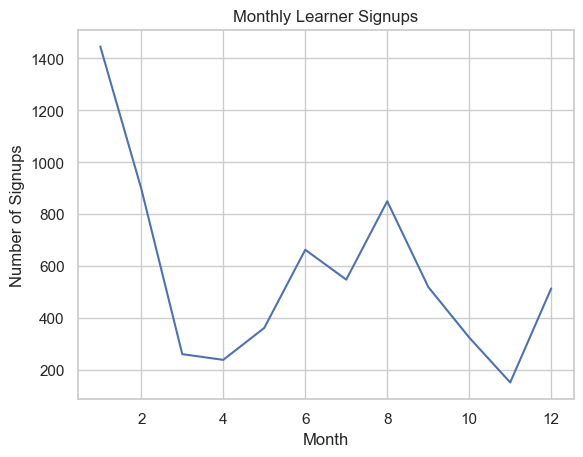

In [31]:
# 1. Monthly Learner Signups
signups = df['Signup_Month'].value_counts().sort_index()
plt.figure()
plt.plot(signups.index, signups.values)
plt.title('Monthly Learner Signups')
plt.xlabel('Month')
plt.ylabel('Number of Signups')
plt.show()



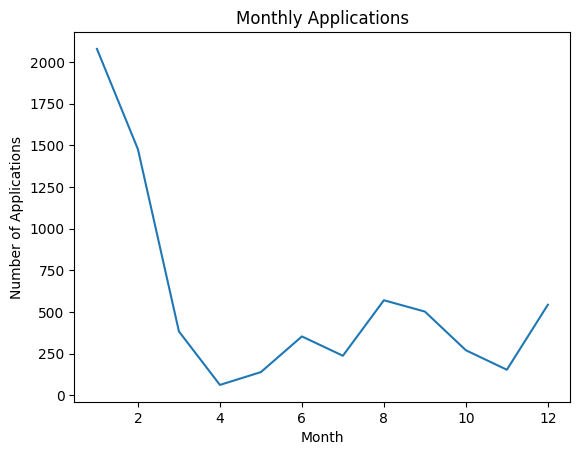

In [23]:
# 2. Monthly Applications
if 'Apply_Month' not in df.columns:
    df['Apply_Month'] = df['Apply Date'].dt.month
apps = df['Apply_Month'].value_counts().sort_index()
plt.figure()
plt.plot(apps.index, apps.values)
plt.title('Monthly Applications')
plt.xlabel('Month')
plt.ylabel('Number of Applications')
plt.show()

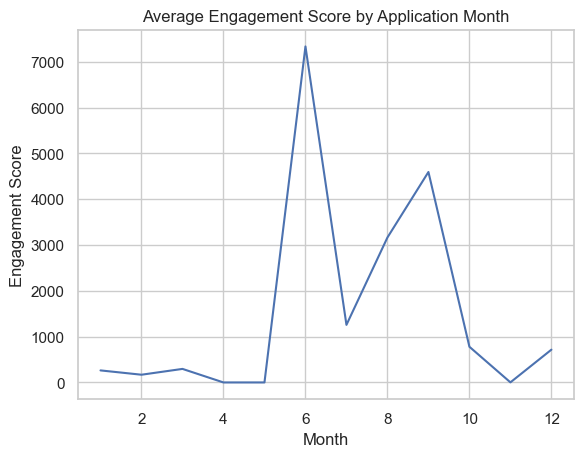

In [38]:
# 3. Average Engagement Score by Application Month
monthly_score = df.groupby('Apply_Month')['Engagement_Score'].mean()
plt.figure()
plt.plot(monthly_score.index, monthly_score.values)
plt.title('Average Engagement Score by Application Month')
plt.xlabel('Month')
plt.ylabel('Engagement Score')
plt.show()


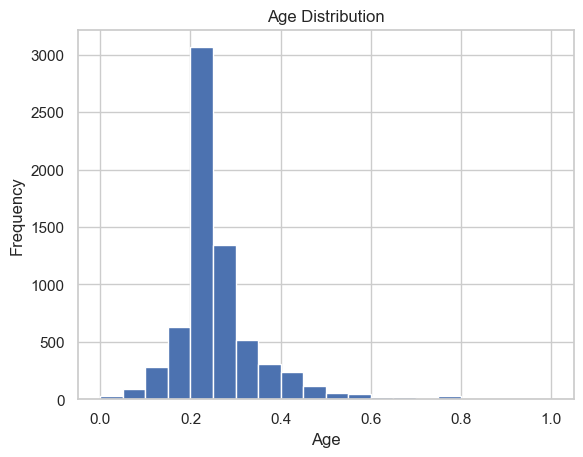

In [37]:
# 4. Age Distribution
plt.figure()
plt.hist(df['Age'].dropna(), bins=20)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

In [32]:
def count_rejected_and_team_allocated(df):
    """
    Returns the count of 'Rejected' and 'Team Allocated' in the Status Description column.
    If 'Rejected' is not present, returns 0 for it.
    """
    status_counts = df['Status Description'].value_counts()
    rejected_count = status_counts.get('Rejected', 0)
    team_allocated_count = status_counts.get('Team Allocated', 0)
    return {'Rejected': rejected_count, 'Team Allocated': team_allocated_count}

# Example usage:
counts = count_rejected_and_team_allocated(df)
print(counts)

{'Rejected': np.int64(2651), 'Team Allocated': np.int64(2535)}


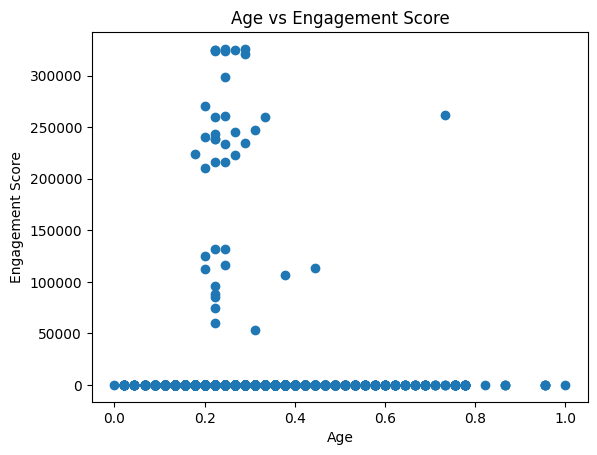

In [26]:
# 5. Age vs Engagement Score
plt.figure()
plt.scatter(df['Age'], df['Engagement_Score'])
plt.title('Age vs Engagement Score')
plt.xlabel('Age')
plt.ylabel('Engagement Score')
plt.show()


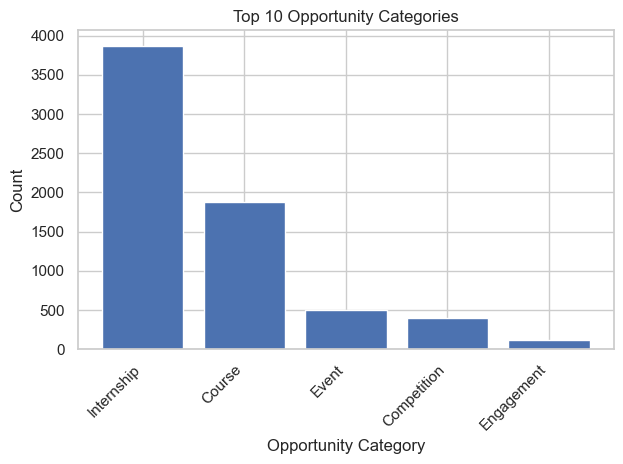

In [35]:
# 6. Top 10 Opportunity Categories
plt.figure()
top_cats = df['Opportunity Category'].value_counts().nlargest(10)
plt.bar(top_cats.index, top_cats.values)
plt.title('Top 10 Opportunity Categories')
plt.xlabel('Opportunity Category')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

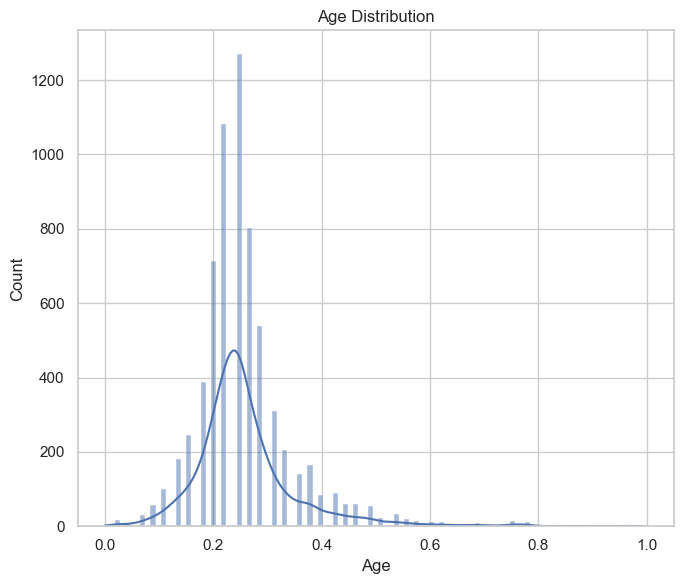

C:\Users\Marium Imran\AppData\Local\Temp\ipykernel_12636\3799563825.py:39: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')


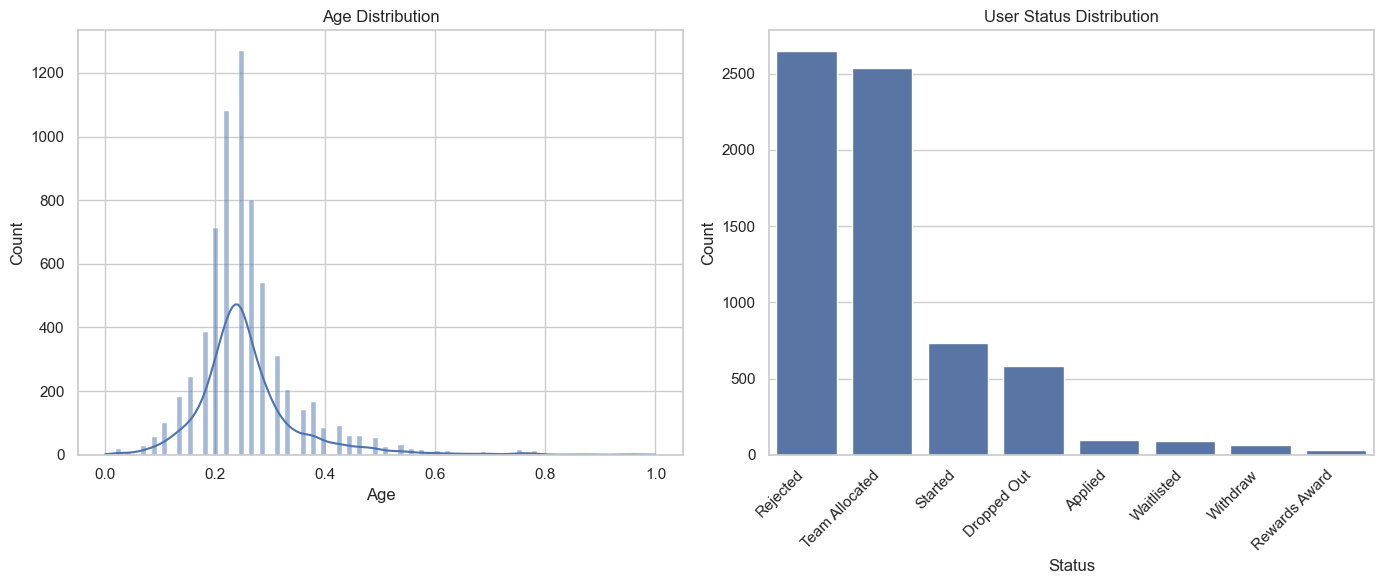

In [39]:
import pandas as pd
# (No need to import matplotlib.pyplot as plt again; it's already imported above.)

# Age Distribution Plot
fig, ax = plt.subplots(figsize=(7, 6))
sns.set_theme(style="whitegrid")
def safe_hist(ax, col, title, xlabel):
    if col in df:
        sns.histplot(df[col].dropna(), kde=True, ax=ax)
    else:
        ax.text(.5, .5, f'{col} not available', ha='center', va='center')
    ax.set_title(title)
    ax.set_xlabel(xlabel)
    ax.set_ylabel('Count')
safe_hist(ax, 'Age', 'Age Distribution', 'Age')
plt.tight_layout()
plt.show()
import seaborn as sns

# Seaborn styling
sns.set_theme(style="whitegrid")

# Helper functions
def safe_hist(ax, col, title, xlabel):
    if col in df:
        sns.histplot(df[col].dropna(), kde=True, ax=ax)
    else:
        ax.text(.5, .5, f'{col} not available', ha='center', va='center')
    ax.set_title(title)
    ax.set_xlabel(xlabel)
    ax.set_ylabel('Count')

def safe_bar(ax, col, order, title, xlabel):
    if col in df:
        counts = df[col].value_counts()
        if order:
            counts = counts.reindex(order).dropna()
        sns.barplot(x=counts.index, y=counts.values, ax=ax)
        ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
    else:
        ax.text(.5, .5, f'{col} not available', ha='center', va='center')
    ax.set_title(title)
    ax.set_xlabel(xlabel)
    ax.set_ylabel('Count')

# Create a 1×2 figure
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Left: Age Distribution
safe_hist(axes[0], 'Age', 'Age Distribution', 'Age')

# Right: User Status Distribution
safe_bar(axes[1],
         'Status Description',
         None,
         'User Status Distribution',
         'Status')

plt.tight_layout()
plt.show()


In [ ]:
# Plot Monthly Applications
plt.figure()
plt.plot(apps.index, apps.values)
plt.title('Monthly Applications')
plt.xlabel('Month')
plt.ylabel('Number of Applications')
plt.show()

In [29]:
print(df.columns.tolist())

['Learner SignUp DateTime', 'Opportunity Id', 'Opportunity Name', 'Opportunity Category', 'Opportunity End Date', 'First Name', 'Date of Birth', 'Institution Name', 'Current/Intended Major', 'Entry created at', 'Status Description', 'Status Code', 'Apply Date', 'Opportunity Start Date', 'Age', 'Opportunity_Duration', 'Engagement_Lag', 'Status_Encoded', 'Gender_Female', 'Gender_Male', 'Gender_Other', 'Country_Algeria', 'Country_American Samoa', 'Country_Australia', 'Country_Azerbaijan', 'Country_Bangladesh', 'Country_Belarus', 'Country_Bhutan', 'Country_Botswana', 'Country_Brazil', 'Country_British Indian Ocean Territory', 'Country_Cameroon', 'Country_Canada', 'Country_China', 'Country_Congo', "Country_Cote d'Ivoire", 'Country_Dominican Republic', 'Country_Egypt', 'Country_Ethiopia', 'Country_Falkland Islands (Malvinas)', 'Country_France', 'Country_Gambia', 'Country_Germany', 'Country_Ghana', 'Country_Honduras', 'Country_India', 'Country_Indonesia', 'Country_Iran  Islamic Republic of Pe